# JAMBOREE PRODUCTIONS | Exploring Relationships

### This script contains the following points:

#### 1. Importing Libraries
#### 2. Importing Data
#### 3. Checking the Data
#### 4. Key Questions to Explore
#### 5. Exploring Relationships
        Correlations / Heatmaps
        Correlation Matrix Observations
        Scatterplots
        Scatterplot Observations
        Pair Plots
        Pair Plot Observations
        Categorical Plots
        Budget Categorical Plot Observations
        Runtime Categorical Plot Observations
#### 6. Revisiting Key Questions

## 1. Importing Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Check matplotlib version
matplotlib.__version__

'3.8.4'

In [3]:
# Display visualizations in notebook without calling them specifically.
%matplotlib inline

## 2. Importing Data

In [4]:
# Set project folder as a string
path = r'/Users/matthewjones/Documents/CareerFoundry/Data Immersion/Achievement 6/Jamboree Entertainment Analysis'

In [5]:
df_movies = pd.read_csv(os.path.join(path, '02. Data', 'Prepared Data', 'clean_movies.csv'), index_col = False)

## 3. Checking the Data

In [6]:
df_movies.shape

(490711, 36)

In [7]:
df_movies.head(5)

,Unnamed: 0,id,title,vote_average,vote_count,release_date,revenue,runtime,budget,synopsis,...,music,mystery,romance,science_fiction,tv_movie,thriller,war,western,runtime_category,budget_category
0,0,27205,Inception,8.364,34495,2010-07-15,8.255328e+08,148,160000000.0,"Cobb, a skilled thief who commits corporate es...",...,0,0,0,1,0,0,0,0,Long Films,High-Budget
1,1,157336,Interstellar,8.417,32571,2014-11-05,7.017292e+08,169,165000000.0,The adventures of a group of explorers who mak...,...,0,0,0,1,0,0,0,0,Long Films,High-Budget
2,2,155,The Dark Knight,8.512,30619,2008-07-16,1.004558e+09,152,185000000.0,Batman raises the stakes in his war on crime. ...,...,0,0,0,0,0,1,0,0,Long Films,High-Budget
3,3,19995,Avatar,7.573,29815,2009-12-15,2.923706e+09,162,237000000.0,"In the 22nd century, a paraplegic Marine is di...",...,0,0,0,1,0,0,0,0,Long Films,High-Budget
4,4,24428,The Avengers,7.710,29166,2012-04-25,1.518816e+09,143,220000000.0,When an unexpected enemy emerges and threatens...,...,0,0,0,1,0,0,0,0,Long Films,High-Budget


In [8]:
# Drop unnecessary column
df_movies = df_movies.drop(['Unnamed: 0'], axis = 1)

In [9]:
df_movies.shape

(490711, 35)

In [10]:
# Subset dataframe to include only films with a budget, a revenue, and a vote count of at least 150
df_voted_movies = df_movies.loc[(df_movies['budget'] > 0) & (df_movies['revenue'] > 0) & 
                                (df_movies['vote_count'] >= 150)]

In [11]:
# Check the subset dataframe's shape
df_voted_movies.shape

(9460, 35)

In [12]:
# Check the dataframe's data types
df_voted_movies.dtypes

id                        int64
title                    object
vote_average            float64
vote_count                int64
release_date             object
revenue                 float64
runtime                   int64
budget                  float64
synopsis                 object
genres                   object
production_companies     object
production_countries     object
spoken_languages         object
original_language        object
action                    int64
adventure                 int64
animation                 int64
comedy                    int64
crime                     int64
documentary               int64
drama                     int64
family                    int64
fantasy                   int64
history                   int64
horror                    int64
music                     int64
mystery                   int64
romance                   int64
science_fiction           int64
tv_movie                  int64
thriller                  int64
war     

## 4. Key Questions to Explore

#### What factors influence a film's revenue?

#### Is there a correlation between a film's revenue and it's vote rating?

#### How does runtime affect a film's performance at the box office and in popularity?

## 5. Exploring Relationships

### Correlations / Heatmaps

In [14]:
# Select only the relevent numerical data to analyze
df_correlation_data = df_voted_movies[['budget', 'runtime', 'vote_count', 'revenue', 'vote_average']]

In [15]:
df_correlation_data.corr()

,budget,runtime,vote_count,revenue,vote_average
budget,1.000000,0.238596,0.580527,0.730445,0.018538
runtime,0.238596,1.000000,0.222578,0.215690,0.356672
vote_count,0.580527,0.222578,1.000000,0.744939,0.314378
revenue,0.730445,0.215690,0.744939,1.000000,0.166271
vote_average,0.018538,0.356672,0.314378,0.166271,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'budget'),
  Text(0, 1.5, 'runtime'),
  Text(0, 2.5, 'vote_count'),
  Text(0, 3.5, 'revenue'),
  Text(0, 4.5, 'vote_average')])

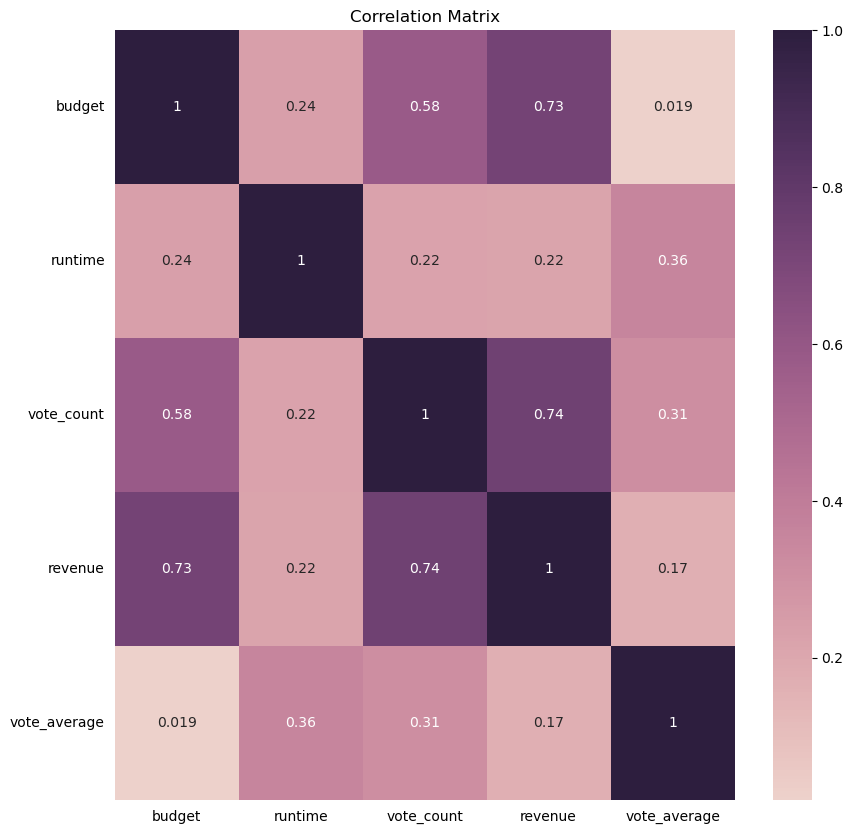

In [16]:
# Set the correlation matrix
f,ax = plt.subplots(figsize=(10,10))

matrix = sns.heatmap(df_correlation_data.corr(), annot = True, ax = ax, 
                     cmap = sns.cubehelix_palette(as_cmap = True))

plt.title('Correlation Matrix')
plt.tick_params(left = False, bottom = False) 
plt.yticks(rotation = 0)

### Correlation Matrix Observations:
        Each variable is perfectly coordinated with itself, so those cells have a coefficient of 1.

        From there, the cells with coefficients closest to 1 mean the two variables have a strong relationship. 
        In this clase, Vote Count X Revenue, Budget X Revenue, and Budget X Vote Count are the 
        strongest relationships in the data. I will not be exploring the Vote Count X Revenue relationship 
        because this relationship is intuitive. Films that have many voters got those voters because they paid 
        to see the film.

        Cells with coefficients between 0.3 and 0.5 show moderate relationships between the two variables. This 
        would add Runtime and Vote Count X Vote Average to that conversation. It is not feasible to 
        manufacture vote count, so I will not be considering any relationships with this variable. Although it 
        is an interesting variable to consider for future analyses.

        The remaining cells have weak to no correlation. Budget X Vote Average has the weakest relationship 
        in this data.

        The strength of these correlation coefficients are also reflected in the color of the cell (darker cells 
        have stronger relationships).

### Scatterplots

Text(29.000000000000007, 0.5, 'Revenue ($)')

<Figure size 1000x1000 with 0 Axes>

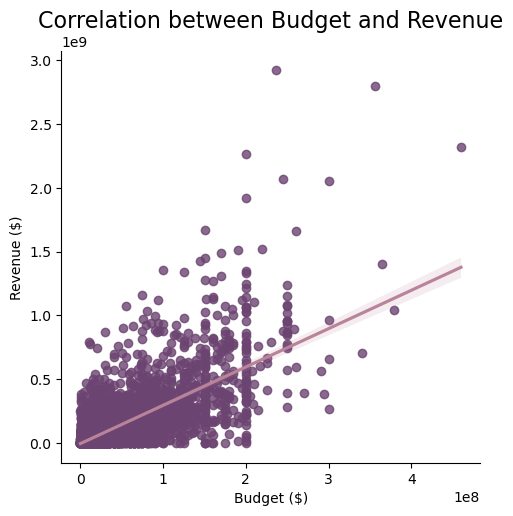

In [17]:
# Plot the scatterplot between budget and revenue
plt.figure(figsize = (10,10))
budget_revenue = sns.lmplot(x = 'budget', y = 'revenue', data = df_correlation_data, 
                            scatter_kws = {'color' : '#6C4471'}, line_kws = {'color': '#B9839A'})

# Format titles and axes
plt.title('Correlation between Budget and Revenue', fontsize = 16)
plt.xlabel('Budget ($)')
plt.ylabel('Revenue ($)')

Text(42.25000000000001, 0.5, 'Vote Average')

<Figure size 1000x1000 with 0 Axes>

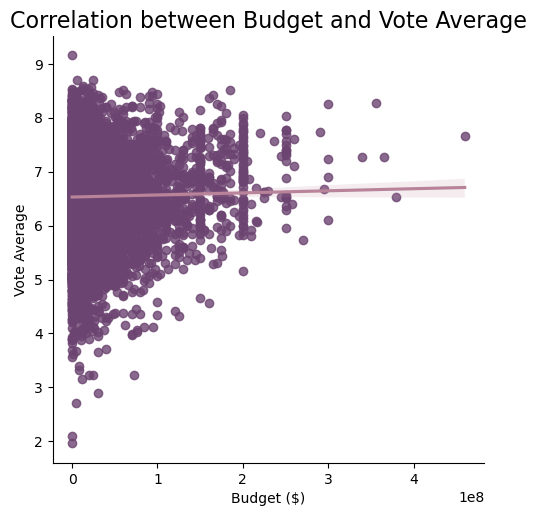

In [24]:
# Plot the scatterplot between budget and vote average
plt.figure(figsize = (10,10))
budget_count = sns.lmplot(x = 'budget', y = 'vote_average', data = df_correlation_data,
                          scatter_kws = {'color' : '#6C4471'}, line_kws = {'color': '#B9839A'})

# Format titles and axes
plt.title('Correlation between Budget and Vote Average', fontsize = 16)
plt.xlabel('Budget ($)')
plt.ylabel('Vote Average')

Text(29.000000000000007, 0.5, 'Revenue ($)')

<Figure size 1000x1000 with 0 Axes>

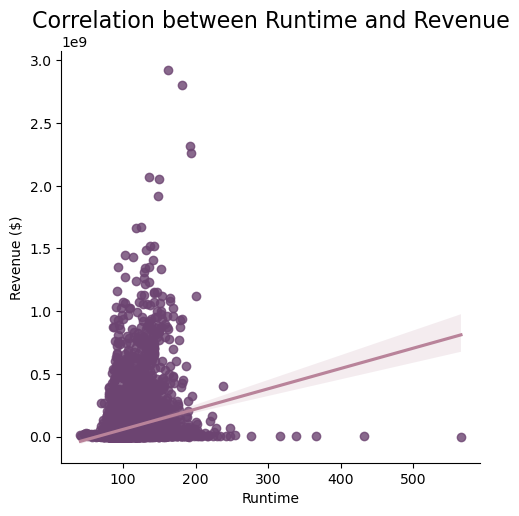

In [25]:
# Plot the scatterplot between runtime and revenue
plt.figure(figsize = (10,10))
count_revenue = sns.lmplot(x = 'runtime', y = 'revenue', data = df_correlation_data,
                           scatter_kws = {'color' : '#6C4471'}, line_kws = {'color': '#B9839A'})

# Format titles and axes
plt.title('Correlation between Runtime and Revenue', fontsize = 16)
plt.xlabel('Runtime')
plt.ylabel('Revenue ($)')

Text(33.37500000000001, 0.5, 'Vote Average')

<Figure size 1000x1000 with 0 Axes>

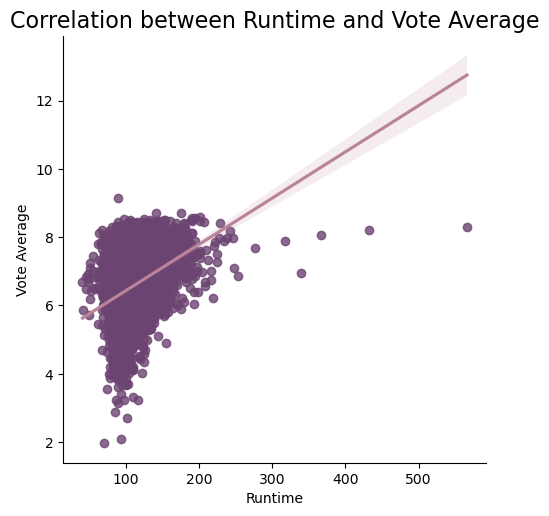

In [23]:
# Plot the scatterplot between runtime and vote average
plt.figure(figsize = (10,10))
count_revenue = sns.lmplot(x = 'runtime', y = 'vote_average', data = df_correlation_data,
                           scatter_kws = {'color' : '#6C4471'}, line_kws = {'color': '#B9839A'})

# Format titles and axes
plt.title('Correlation between Runtime and Vote Average', fontsize = 16)
plt.xlabel('Runtime')
plt.ylabel('Vote Average')

### Scatterplots Observations:
        For most of these scatterplots, there exists a positive relationship between the two variables. As a 
        film's budget increases, so does it's revenue. And as a film's runtime increases, so does it's revenue 
        and vote average.

        Like we saw in the correlation matrix, there is almost no correlation between a film's budget and it's 
        vote average. It's as if it doesn't matter how big a film is to how well-liked it will be with movie 
        goers. 

        The points on each scatterplot are not tightly aligned to the regression line, so there is the potential 
        that a linear relationship may not be the best way to describe their correlation. In particular, it 
        looks as if the relationship between budget and revenue could be modeled with an exponential 
        regression, and the relationship between runtime and revenue could be modeled with a parabolic 
        regression.

### Pair Plots

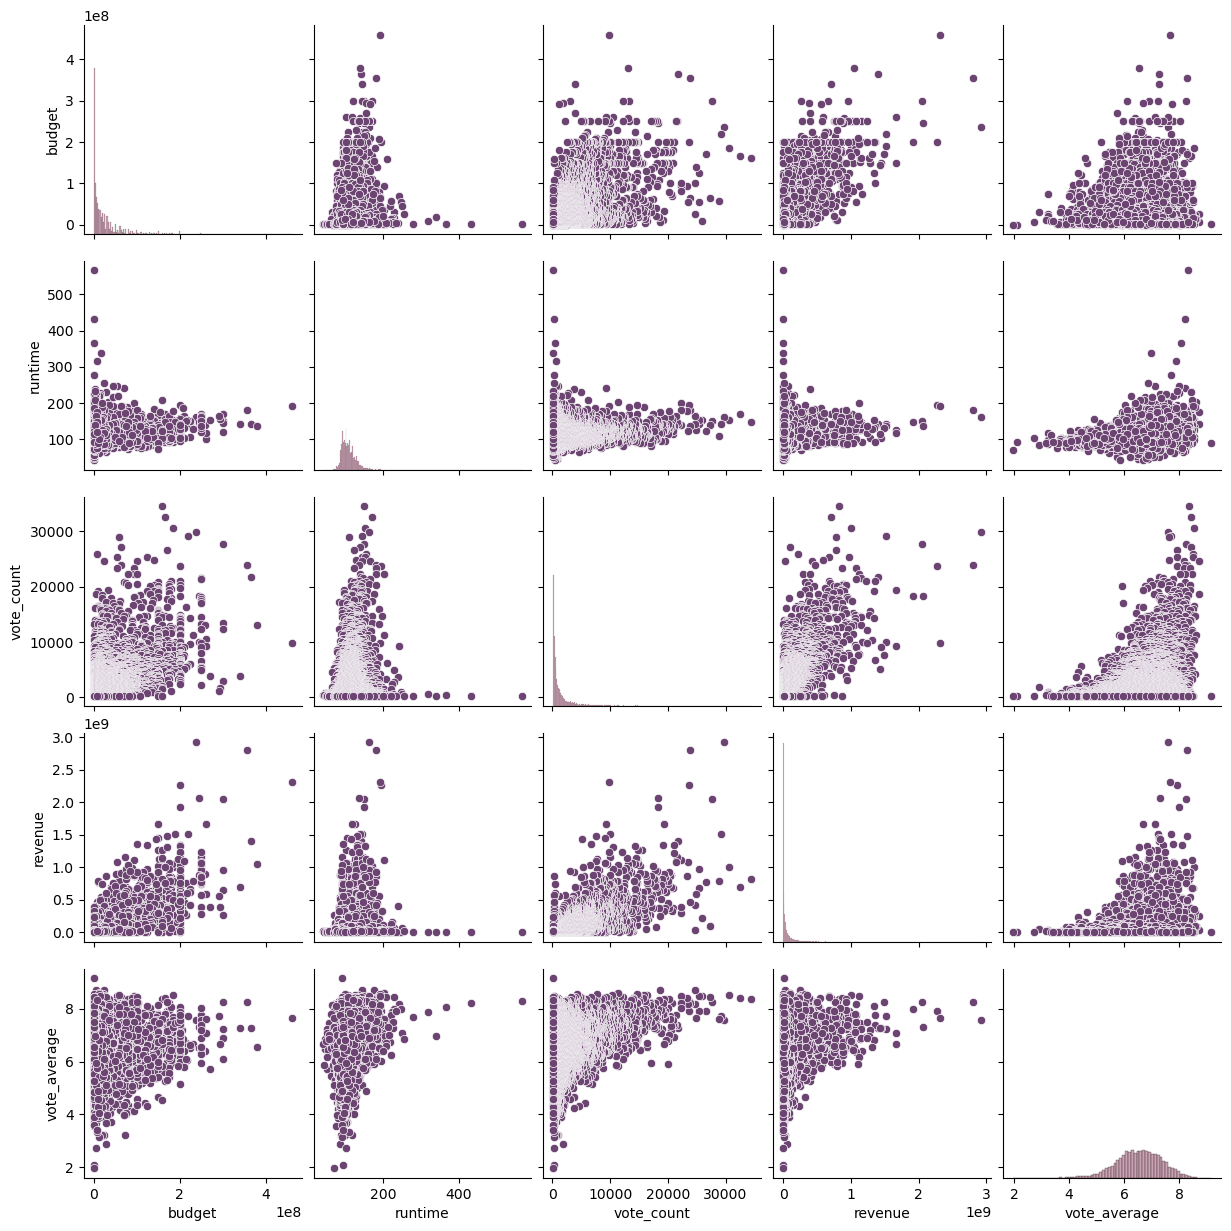

In [27]:
# Plot the pair plot
movie_pairplot = sns.pairplot(df_correlation_data, plot_kws = {'color' : '#6C4471'}, 
                              diag_kws = {'color' : '#B9839A'})



### Pair Plots Observations:
        When looking at what variables could predict revenue, we again see how budget has a positive 
        relationship. It appears that runtime has an interesting relationship with revenue, almost a normal 
        (parabolic) distribution. And we can also see that films with a higher vote average were the films most 
        likely to have a higher revenue.

        When looking at what variables could predict vote average, we see that there's a wide range for all 
        variables at the low end. Films with low budgets and short run times can have low vote averages and high 
        vote averages. However, as all of these variables increase, the variability lessens and the films are 
        more likely to have higher vote averages.

### Categorical Plots

Text(0, 0.5, '')

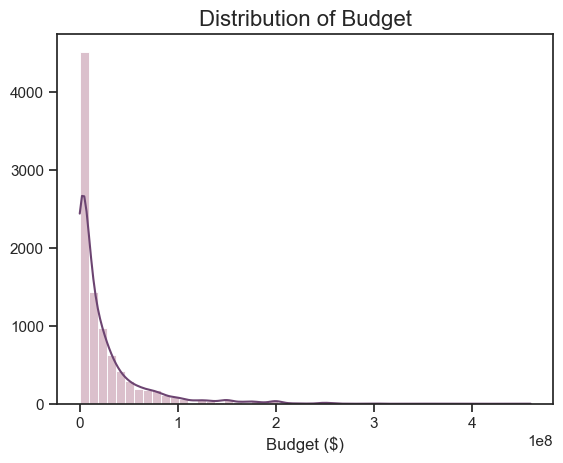

In [34]:
# Plot the histogram of the 'budget' column
ax = sns.histplot(df_voted_movies['budget'], bins = 50, color = '#B9839A', kde = True)
ax.lines[0].set_color('#6C4471')

# Format titles and axes
plt.title('Distribution of Budget', fontsize = 16)
plt.xlabel('Budget ($)')
plt.ylabel('')

Text(0, 0.5, '')

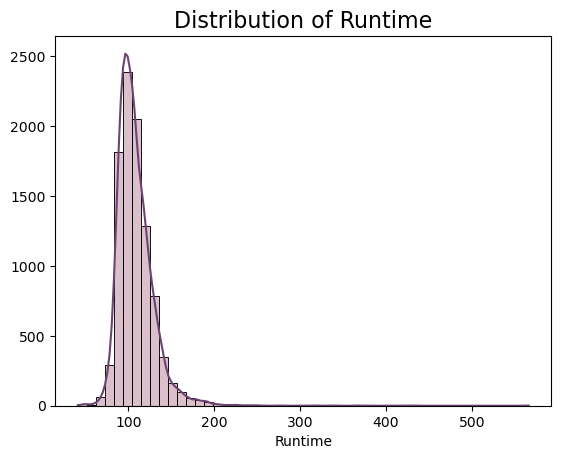

In [28]:
# Plot the histogram of the 'runtime' column
ax2 = sns.histplot(df_voted_movies['runtime'], bins = 50, color = '#B9839A', kde = True)
ax2.lines[0].set_color('#6C4471')

# Format titles and axes
plt.title('Distribution of Runtime', fontsize = 16)
plt.xlabel('Runtime')
plt.ylabel('')

Text(12.444444444444445, 0.5, 'Revenue ($)')

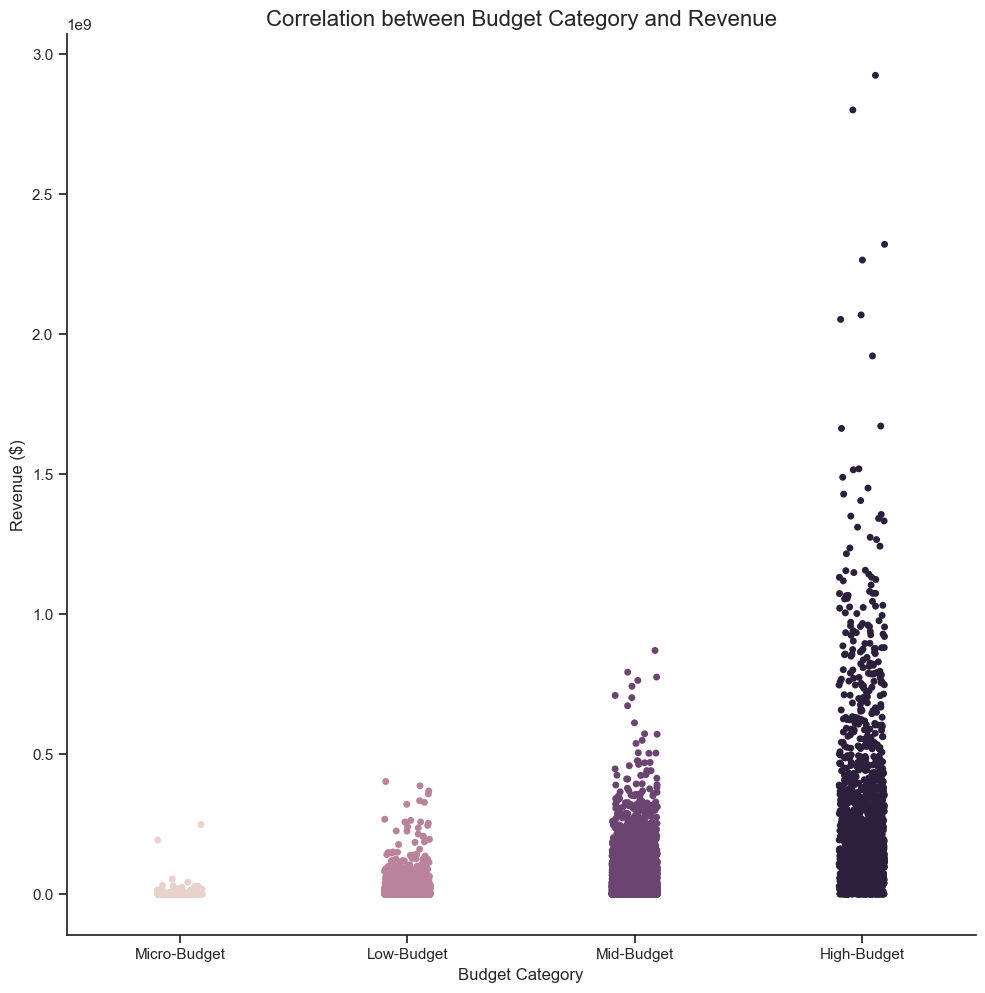

In [31]:
# Plot the categorical plot of revenue by budget category
sns.set(style="ticks")
g = sns.catplot(x = 'budget_category', y = 'revenue', hue = 'budget_category', data = df_voted_movies, 
                height = 10, aspect = 1,
                order = ['Micro-Budget', 'Low-Budget', 'Mid-Budget', 'High-Budget'],
                palette=sns.color_palette(['#2B1F3C', '#6C4471', '#B9839A', '#E8D2CC']))

# Format titles and axes
plt.title('Correlation between Budget Category and Revenue', fontsize = 16)
plt.xlabel('Budget Category')
plt.ylabel('Revenue ($)')

Text(25.194444444444443, 0.5, 'Vote Average')

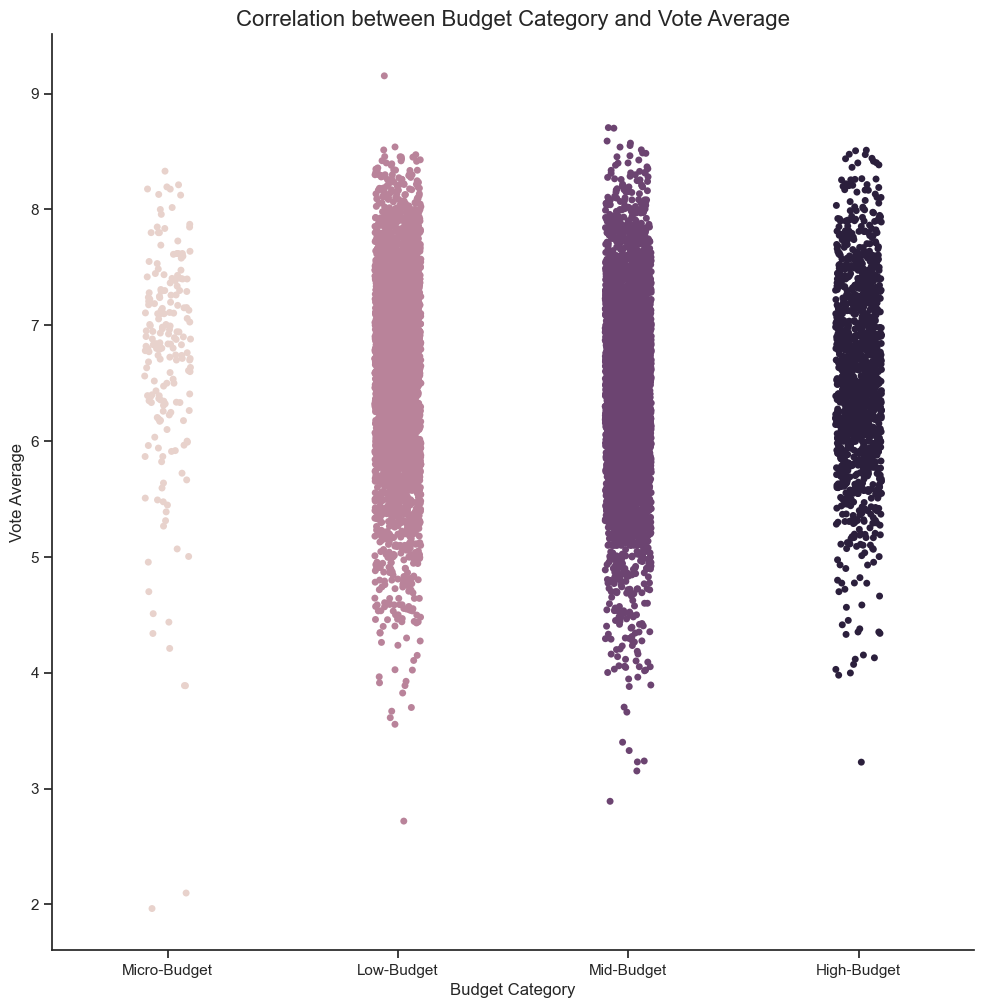

In [32]:
# Plot the categorical plot of vote average by budget category
sns.set(style="ticks")
g2 = sns.catplot(x = 'budget_category', y = 'vote_average', hue = 'budget_category', data = df_voted_movies, 
                height = 10, aspect = 1,
                order = ['Micro-Budget', 'Low-Budget', 'Mid-Budget', 'High-Budget'],
                palette=sns.color_palette(['#2B1F3C', '#6C4471', '#B9839A', '#E8D2CC']))

# Format titles and axes
plt.title('Correlation between Budget Category and Vote Average', fontsize = 16)
plt.xlabel('Budget Category')
plt.ylabel('Vote Average')

### Budget Categorical Plot Observations:
If we want to make films with high revenue, we need to invest in the film's budget. In this data, there is a clear revenue ceiling for each budget category. And only films of a higher budget category were able to exceed that ceiling.

On the flipside, budget does not have an impact on vote average. Films with a micro-budget and films with a high-budget have the same distribution of vote averages. You're just as likely to get a popular film from a movie with no money invested in it. This is interesting, because we're seeing competing results. Are we more interested in revenue or vote average?

Text(12.444444444444445, 0.5, 'Revenue ($)')

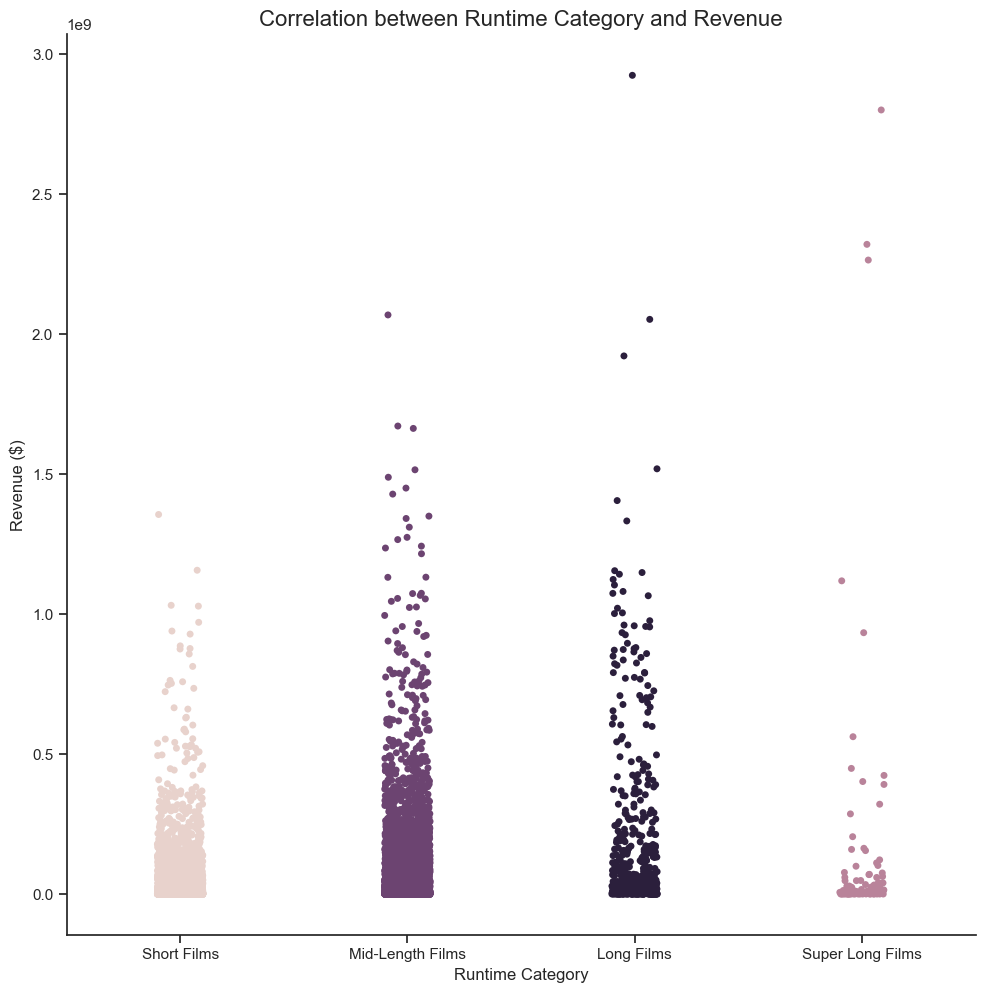

In [33]:
# Plot the categorical plot of revenue by runtime category
sns.set(style = 'ticks')
g3 = sns.catplot(x = 'runtime_category', y = 'revenue', hue = 'runtime_category', data = df_voted_movies, 
                height = 10, aspect = 1,
                order = ['Short Films', 'Mid-Length Films', 'Long Films', 'Super Long Films'],
                palette=sns.color_palette(['#2B1F3C', '#6C4471', '#B9839A', '#E8D2CC']))

# Format titles and axes
plt.title('Correlation between Runtime Category and Revenue', fontsize = 16)
plt.xlabel('Runtime Category')
plt.ylabel('Revenue ($)')

Text(25.194444444444443, 0.5, 'Vote Average')

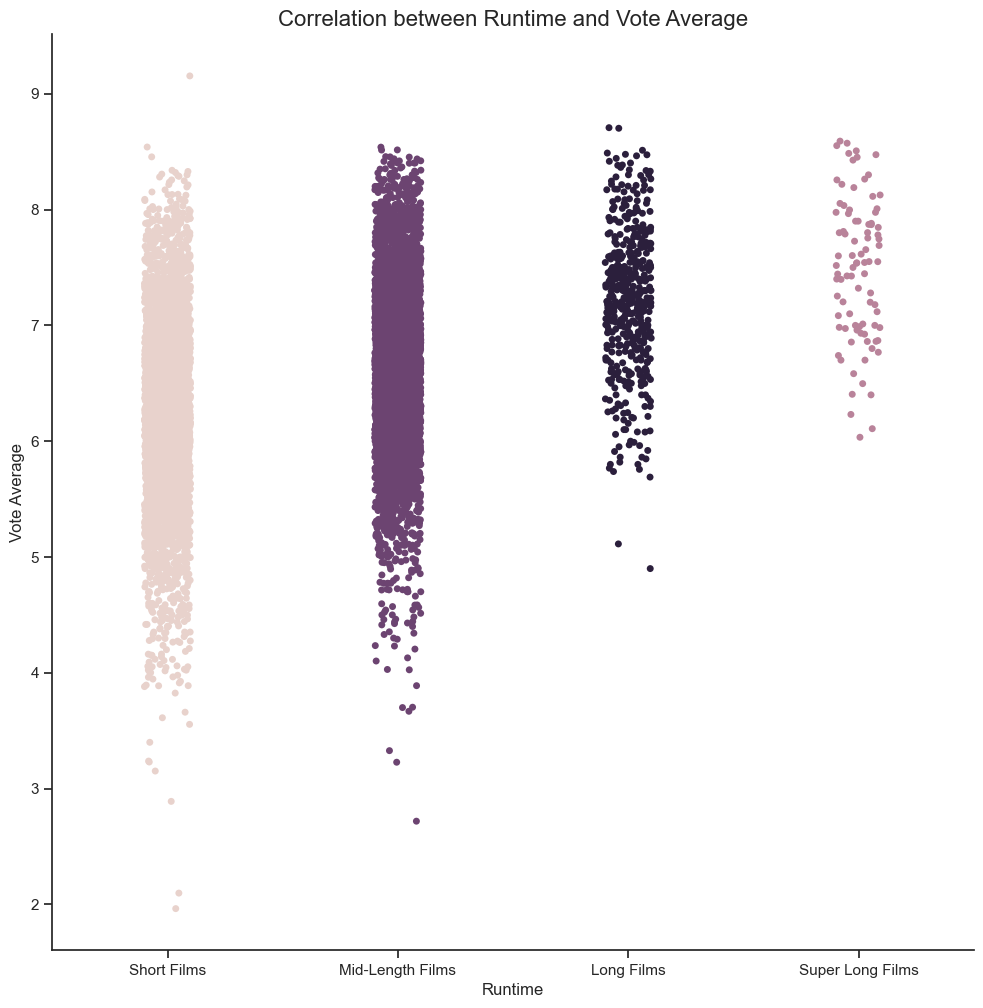

In [30]:
# Plot the categorical plot of vote average by runtime category
sns.set(style = 'ticks')
g4 = sns.catplot(x = 'runtime_category', y = 'vote_average', hue = 'runtime_category', data = df_voted_movies, 
                height = 10, aspect = 1,
                order = ['Short Films', 'Mid-Length Films', 'Long Films', 'Super Long Films'],
                palette=sns.color_palette(['#2B1F3C', '#6C4471', '#B9839A', '#E8D2CC']))

# Format titles and axes
plt.title('Correlation between Runtime Category and Vote Average', fontsize = 16)
plt.xlabel('Runtime Category')
plt.ylabel('Vote Average')

### Runtime Categorical Plot Observations:
        While there are some outliers in the Long and Super Long Film category that produced a lot of revenue, 
        Mid-Length Films and Short Films are more consistent in producing more revenue. There seems to be a 
        sweet spot where revenue peaks, and it falls off for both shorter films and longer films.

        As films get longer, the vote average is more consistently higher. There is less variation between Long 
        and Super Long Films in regards to vote average. It would be very difficult to predict the vote average 
        of a Short or Mid-Length Film, but it would be easy to predict the vote average of a Long or Super Long 
        Film. Again, there are competing priorities with runtime. Is it more advantageous to have a shorter film 
        with a higher likelihood of generating more revenue? Or is it more advantageous to have a longer film 
        that fewer people will watch, but will love?

Text(25.194444444444443, 0.5, 'Budget ($)')

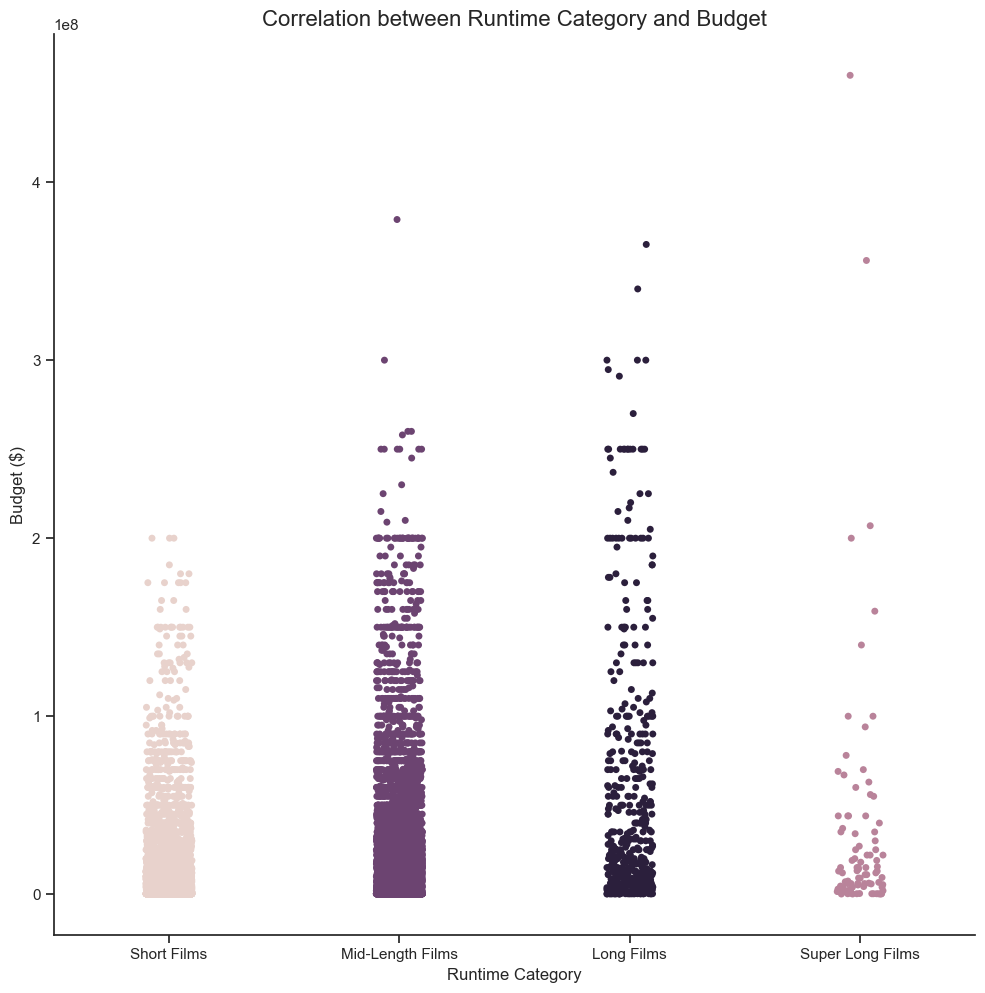

In [37]:
# Plot the categorical plot of budget by runtime category
sns.set(style = 'ticks')
g = sns.catplot(x = 'runtime_category', y = 'budget', hue = 'runtime_category', data = df_voted_movies, 
                height = 10, aspect = 1,
                order = ['Short Films', 'Mid-Length Films', 'Long Films', 'Super Long Films'],
                palette=sns.color_palette(['#2B1F3C', '#6C4471', '#B9839A', '#E8D2CC']))

# Format titles and axes
plt.title('Correlation between Runtime Category and Budget', fontsize = 16)
plt.xlabel('Runtime Category')
plt.ylabel('Budget ($)')

Text(8.194444444444445, 0.5, 'Runtime')

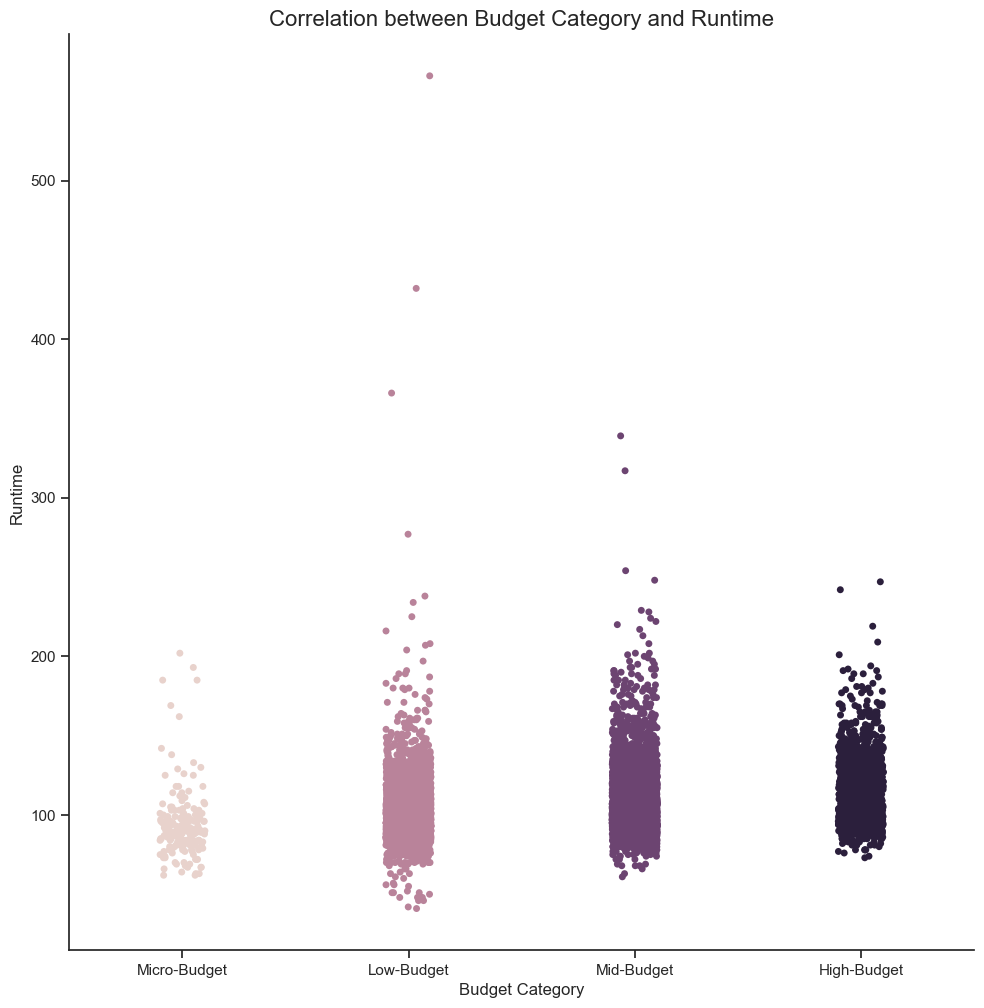

In [40]:
# Plot the categorical plot of runtime by budget category
sns.set(style = 'ticks')
g = sns.catplot(x = 'budget_category', y = 'runtime', hue = 'budget_category', data = df_voted_movies, 
                height = 10, aspect = 1,
                order = ['Micro-Budget', 'Low-Budget', 'Mid-Budget', 'High-Budget'],
                palette=sns.color_palette(['#2B1F3C', '#6C4471', '#B9839A', '#E8D2CC']))

# Format titles and axes
plt.title('Correlation between Budget Category and Runtime', fontsize = 16)
plt.xlabel('Budget Category')
plt.ylabel('Runtime')

## 6. Revisiting Key Questions

### What factors influence a film's revenue?
        Both a film's budget and it's vote count are positively correlation to it's revenue. Films that receive 
        a higher budget are likely to net a higher revenue. And films that receive many votes, are likely to 
        net a higher revenue. In addition, film between 100-120 minutes long are more likely to have higher 
        revenue than films that are shorter or longer than 100-120 minutes.

### Is there a correlation between a film's revenue and it's vote rating?
        There is a weak relationship between a film's revenue and it's vote average. Film's with a high vote  
        average are likely to have high revenue as well, but the variation in revenue among films with a high 
        vote average is much wider than films with a low vote average. There are no films that had a low vote 
        average that made a lot of revenue.

### How does runtime affect a film's performance at the box office and in popularity?
        There exists a sweet spot in a film's runtime where any film that is shorter nets less revenue, and any 
        film that is longer nets less revenue. This sweet spot seems to be around 100-120 minutes. However, 
        longer films are always rated highly (above 6 vote average out of 10). There is a wider range of 
        vote averages for films that are between 100-120 minutes long

### New Questions
        - What other factors could predict the popularity of films between 100-120 minutes long?
        - What exactly is the sweet spot range? (within 20 minutes)
        - What kind of model would best represent the relationship between a film's budget and it's revenue?
        - Are the factors that predict revenue the same as the factors that predict popularity?
        - Which genres result in the largest percent difference between budget and revenue?

### Hypotheses to Test
        - Action and Drama films between 100-120 minutes long are more likely to be more popular than the same 
        length movies in other genres.
        - Films that are 110 minutes long make the most revenue on average.
        - An exponential model describes the relationship between a film's budget and it's revenue.
        - The same factors that predict revenue will predict popularity.
        - Horror, Animation, and Science Fiction films make the largest percent difference between budget and 
        revenue.